# Quantifying Non-Shot Chances

Add methodology and contents of notebook

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib.animation as animation

import Metrica_IO as mio
#import Metrica_Viz as mviz
import Metrica_Functions_TLMAnalytics as mfun

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## Load Metrica Tracking Data

Loading data using MetricaIO, need to convert to StatsBomb consistent coordinates since xG model was trained using that coordinate system. The coefficients of the Logistic Regressions are dependent on those coordinate distances and angles.

In [3]:
events = mio.read_event_data('sample-data-master/data',2)
tracking_home = mio.tracking_data('sample-data-master/data'
                                  , 2
                                  , 'Home')
tracking_away = mio.tracking_data('sample-data-master/data/'
                                  , 2
                                  , 'Away')
tracking_home.head(3)

Reading team: home
Reading team: away


,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
events = mfun.to_statsbomb_coordinates(events)
tracking_home = mfun.to_statsbomb_coordinates(tracking_home)
tracking_away = mfun.to_statsbomb_coordinates(tracking_away)
tracking_home.tail(3)

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
141154,2,5646.16,7.542,39.0056,46.1988,67.7152,27.0696,46.916,32.5704,54.2328,NaN,NaN,48.7104,73.5984,46.7832,34.9368,43.4592,35.0256,NaN,NaN,33.9864,51.1464,NaN,NaN,49.0044,68.4408,61.2348,4.2312,33.6372,50.6192,NaN,NaN
141155,2,5646.20,7.542,39.0056,46.1988,67.7152,27.0696,46.916,32.5704,54.2328,NaN,NaN,48.7104,73.5984,46.8012,35.0336,43.4592,35.0256,NaN,NaN,33.9192,51.1240,NaN,NaN,49.0044,68.4408,61.2336,4.1664,33.6708,50.6352,NaN,NaN
141156,2,5646.24,7.542,39.0056,46.1988,67.7152,27.0696,46.916,32.5704,54.2328,NaN,NaN,48.7104,73.5984,46.8084,35.0000,43.4592,35.0256,NaN,NaN,33.8412,51.1016,NaN,NaN,49.0044,68.4408,61.2348,4.1232,33.6780,50.8072,NaN,NaN


In [5]:
# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home,tracking_away,events = mfun.to_single_playing_direction(tracking_home,tracking_away,events)
tracking_home.tail(3)

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
141154,2,5646.16,112.458,40.9944,73.8012,12.2848,92.9304,33.084,87.4296,25.7672,NaN,NaN,71.2896,6.4016,73.2168,45.0632,76.5408,44.9744,NaN,NaN,86.0136,28.8536,NaN,NaN,70.9956,11.5592,58.7652,75.7688,86.3628,29.3808,NaN,NaN
141155,2,5646.20,112.458,40.9944,73.8012,12.2848,92.9304,33.084,87.4296,25.7672,NaN,NaN,71.2896,6.4016,73.1988,44.9664,76.5408,44.9744,NaN,NaN,86.0808,28.8760,NaN,NaN,70.9956,11.5592,58.7664,75.8336,86.3292,29.3648,NaN,NaN
141156,2,5646.24,112.458,40.9944,73.8012,12.2848,92.9304,33.084,87.4296,25.7672,NaN,NaN,71.2896,6.4016,73.1916,45.0000,76.5408,44.9744,NaN,NaN,86.1588,28.8984,NaN,NaN,70.9956,11.5592,58.7652,75.8768,86.3220,29.1928,NaN,NaN


## Plotting Tracking Data with StatsBomb Coordinates

FoT plotting used 106, 68 size pitches and had the origin on the centre circle. StatsBomb has length 120, 80 and origin at top left. Not sure if still needs to be flipped vertically as StatsBomb goes 0-120 along x-axis and 0-80 from top left to bottom left along y-axes. But the StatsBomb coordinates are going from 0-80 bottom left to top left, doesn't seem to affect the absolute distances but may confuse left/right flanks.

Change to plot_pitch is to change field dimensions to 120 x 80 and move the origin to the corner

### plot_pitch

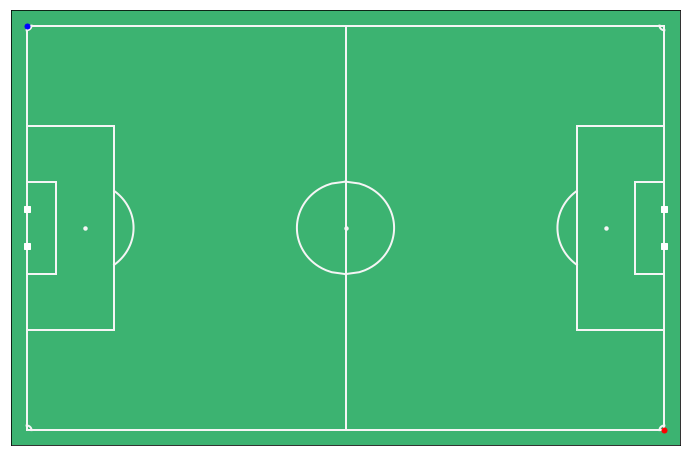

In [6]:
fig, ax = mfun.plot_pitch(field_dimen=(120, 80))
# Origin
ax.plot(0, 0, 'b.', MarkerSize=10)
# End
ax.plot(120, 80, 'r.', MarkerSize=10)

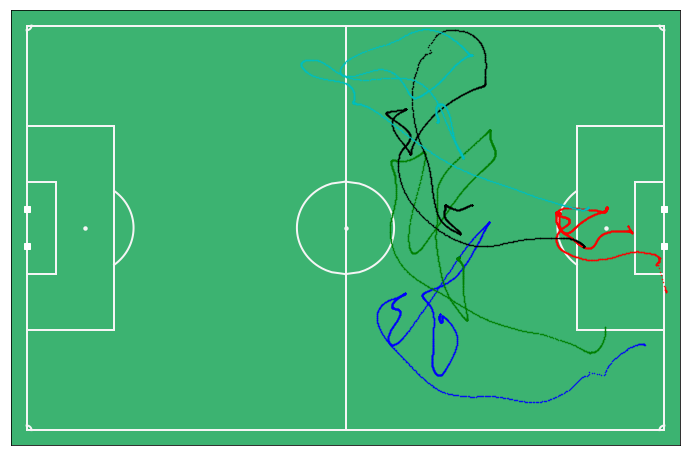

In [7]:
fig, ax = mfun.plot_pitch(field_dimen=(120, 80))
ax.plot(tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', MarkerSize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', MarkerSize=1)
ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', MarkerSize=1)
ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', MarkerSize=1)
ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', MarkerSize=1)



### plot_frame

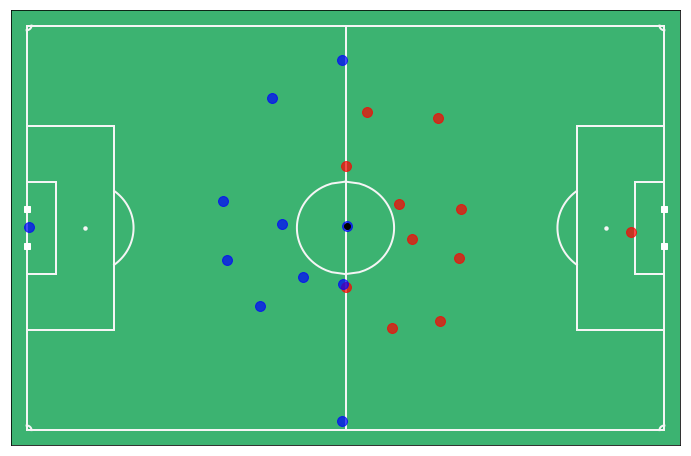

In [8]:
# plot player positions at ,atckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mfun.plot_frame(tracking_home.loc[KO_Frame],
                         tracking_away.loc[KO_Frame],
                         field_dimen = (120, 80))

### plot_events

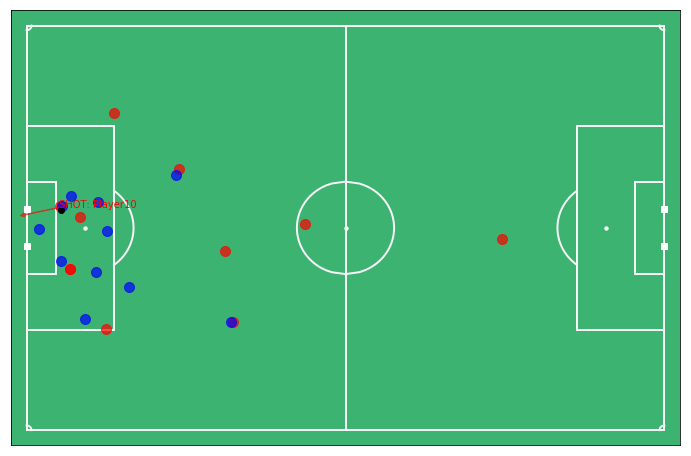

In [22]:
fig,ax = mfun.plot_events( events.loc[[198]], indicators = ['Marker','Arrow'], annotate=True, field_dimen = (120, 80) )
goal_frame = events.loc[198]['Start Frame']
fig,ax = mfun.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) , field_dimen = (120, 80))

## Calculate xG

Using Logistic Regression model trained on StatsBomb's event data with freeze frame information on defender positions.

Uses:
- distance
- angle
- distance to nearest defender
- number of blocking defenders

### Logistic Regression xG Model

Reminder of the coordinates and where the posts are, will need them to calculate features (eg. angle and number of blocking defenders).

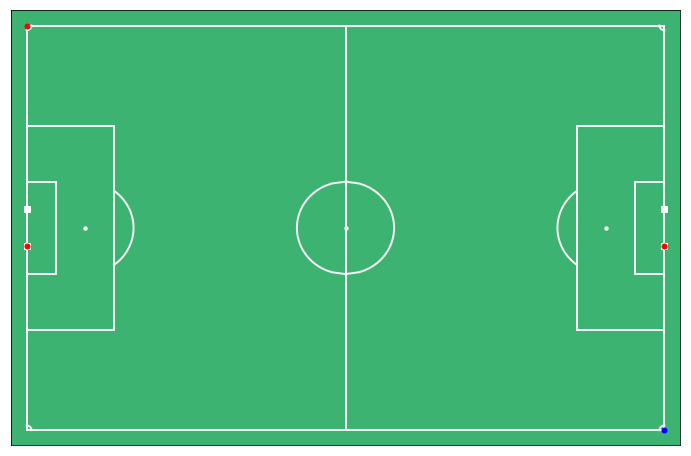

In [23]:
# For every 'shot' (or frame of the match) need to calculate distance, angle, distance to nearest defender and number of blocking defenders:
fig, ax = mfun.plot_pitch(field_dimen = (120, 80))
# Origin
ax.plot(0, 0, 'r.', MarkerSize=10)
# End
ax.plot(120, 80, 'b.', MarkerSize=10)
# Left Goal Posts
#ax.plot(0, 40-(8*0.9144)/2, 'r.', MarkerSize=10)
ax.plot(0, 40+(8*0.9144)/2, 'r.', MarkerSize=10)
# Right Goal Posts
#ax.plot(120, 40-(8*0.9144)/2, 'r.', MarkerSize=10)
ax.plot(120, 40+(8*0.9144)/2, 'r.', MarkerSize=10)

### Create Features

In [24]:
start_frame = 73600
number_frames = 500

In [25]:
tracking_frames = mfun.create_features(tracking_home = tracking_home,
                                       tracking_away = tracking_away,
                                       start_frame = start_frame,
                                       number_frames = number_frames,
                                       field_dimen = (120, 80),
                                       attacking_team = 'Home')
tracking_frames.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,distance,angle,distance_nearest_defender,number_blocking_defenders
0,2,2944.04,114.5076,38.3840,99.9660,47.5952,98.3304,39.7776,99.0168,31.3080,94.0212,20.6680,77.4744,37.0456,85.7964,37.1216,82.9884,28.9192,78.8604,11.8024,67.0140,43.1328,68.9016,21.0704,NaN,NaN,NaN,NaN,NaN,NaN,85.9632,36.9216,29.1348,37.1792,71.8860,12.2800,65.6304,20.5376,60.3024,38.4784,67.4688,54.4128,89.0748,21.1224,73.0884,40.0120,85.1820,29.5272,87.0300,59.9872,92.4360,44.3368,97.4772,27.6896,NaN,NaN,86.018302,0.084937,7.435551,2.0
1,2,2944.08,114.4548,38.4000,99.8580,47.7112,98.1756,39.8632,98.9760,31.3712,93.9600,20.7464,77.2428,36.9448,85.6260,37.3232,82.7616,28.9880,78.7476,11.8640,66.9048,43.2080,68.7468,21.1264,NaN,NaN,NaN,NaN,NaN,NaN,85.7916,37.1264,29.0652,37.1704,71.6748,12.4088,65.4576,20.6824,60.2508,38.6136,67.2744,54.3944,88.9644,21.1728,72.9624,40.0856,84.9540,29.5952,86.8536,59.8576,92.3136,44.4008,97.3728,27.7104,NaN,NaN,85.839712,0.085120,7.577635,2.0
2,2,2944.12,114.4008,38.4160,99.7464,47.8328,98.0196,39.9512,98.9328,31.4288,93.8988,20.8184,77.0088,36.8464,85.4532,37.5256,82.5300,29.0592,78.6336,11.9184,66.7920,43.2856,68.5896,21.1848,NaN,NaN,NaN,NaN,NaN,NaN,85.6224,37.3280,28.9944,37.1680,71.4612,12.5304,65.2836,20.8224,60.1968,38.7464,67.0788,54.3792,88.8492,21.2256,72.8328,40.1616,84.7140,29.6840,86.6748,59.7216,92.1900,44.4664,97.2672,27.7336,NaN,NaN,85.664082,0.085301,7.697787,2.0
3,2,2944.16,114.3480,38.4320,99.6360,47.9520,97.8660,40.0288,98.8872,31.4888,93.8364,20.8832,76.7712,36.7568,85.2804,37.7240,82.2936,29.1320,78.5160,11.9752,66.6768,43.3600,68.4276,21.2376,NaN,NaN,NaN,NaN,NaN,NaN,85.4496,37.5304,28.9212,37.1760,71.2428,12.6544,65.1048,20.9568,60.1416,38.8760,66.8844,54.3632,88.7328,21.2712,72.7032,40.2344,84.4764,29.7688,86.4924,59.5864,92.0652,44.5280,97.1592,27.7584,NaN,NaN,85.485280,0.085485,7.822375,0.0
4,2,2944.20,114.2916,38.4472,99.5208,48.0776,97.7136,40.1024,98.8392,31.5496,93.7716,20.9424,76.5336,36.6632,85.1076,37.9232,82.0536,29.1992,78.3948,12.0336,66.5580,43.4408,68.2632,21.2928,NaN,NaN,NaN,NaN,NaN,NaN,85.2768,37.7288,28.8456,37.1840,71.0232,12.7808,64.9260,21.0936,60.0816,39.0016,66.6888,54.3496,88.6128,21.3192,72.5688,40.3080,84.2304,29.8608,86.3088,59.4448,91.9380,44.5920,97.0500,27.7848,NaN,NaN,85.307039,0.085669,7.937278,0.0


### Calculate xG by Frame

In [26]:
tracking_frames = mfun.create_xG(tracking_frames)
tracking_frames.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,distance,angle,distance_nearest_defender,number_blocking_defenders,xG
0,2,2944.04,114.5076,38.3840,99.9660,47.5952,98.3304,39.7776,99.0168,31.3080,94.0212,20.6680,77.4744,37.0456,85.7964,37.1216,82.9884,28.9192,78.8604,11.8024,67.0140,43.1328,68.9016,21.0704,NaN,NaN,NaN,NaN,NaN,NaN,85.9632,36.9216,29.1348,37.1792,71.8860,12.2800,65.6304,20.5376,60.3024,38.4784,67.4688,54.4128,89.0748,21.1224,73.0884,40.0120,85.1820,29.5272,87.0300,59.9872,92.4360,44.3368,97.4772,27.6896,NaN,NaN,86.018302,0.084937,7.435551,2.0,0.000049
1,2,2944.08,114.4548,38.4000,99.8580,47.7112,98.1756,39.8632,98.9760,31.3712,93.9600,20.7464,77.2428,36.9448,85.6260,37.3232,82.7616,28.9880,78.7476,11.8640,66.9048,43.2080,68.7468,21.1264,NaN,NaN,NaN,NaN,NaN,NaN,85.7916,37.1264,29.0652,37.1704,71.6748,12.4088,65.4576,20.6824,60.2508,38.6136,67.2744,54.3944,88.9644,21.1728,72.9624,40.0856,84.9540,29.5952,86.8536,59.8576,92.3136,44.4008,97.3728,27.7104,NaN,NaN,85.839712,0.085120,7.577635,2.0,0.000050
2,2,2944.12,114.4008,38.4160,99.7464,47.8328,98.0196,39.9512,98.9328,31.4288,93.8988,20.8184,77.0088,36.8464,85.4532,37.5256,82.5300,29.0592,78.6336,11.9184,66.7920,43.2856,68.5896,21.1848,NaN,NaN,NaN,NaN,NaN,NaN,85.6224,37.3280,28.9944,37.1680,71.4612,12.5304,65.2836,20.8224,60.1968,38.7464,67.0788,54.3792,88.8492,21.2256,72.8328,40.1616,84.7140,29.6840,86.6748,59.7216,92.1900,44.4664,97.2672,27.7336,NaN,NaN,85.664082,0.085301,7.697787,2.0,0.000052
3,2,2944.16,114.3480,38.4320,99.6360,47.9520,97.8660,40.0288,98.8872,31.4888,93.8364,20.8832,76.7712,36.7568,85.2804,37.7240,82.2936,29.1320,78.5160,11.9752,66.6768,43.3600,68.4276,21.2376,NaN,NaN,NaN,NaN,NaN,NaN,85.4496,37.5304,28.9212,37.1760,71.2428,12.6544,65.1048,20.9568,60.1416,38.8760,66.8844,54.3632,88.7328,21.2712,72.7032,40.2344,84.4764,29.7688,86.4924,59.5864,92.0652,44.5280,97.1592,27.7584,NaN,NaN,85.485280,0.085485,7.822375,0.0,0.000104
4,2,2944.20,114.2916,38.4472,99.5208,48.0776,97.7136,40.1024,98.8392,31.5496,93.7716,20.9424,76.5336,36.6632,85.1076,37.9232,82.0536,29.1992,78.3948,12.0336,66.5580,43.4408,68.2632,21.2928,NaN,NaN,NaN,NaN,NaN,NaN,85.2768,37.7288,28.8456,37.1840,71.0232,12.7808,64.9260,21.0936,60.0816,39.0016,66.6888,54.3496,88.6128,21.3192,72.5688,40.3080,84.2304,29.8608,86.3088,59.4448,91.9380,44.5920,97.0500,27.7848,NaN,NaN,85.307039,0.085669,7.937278,0.0,0.000107


## Check xG per Possession

### Highest xG

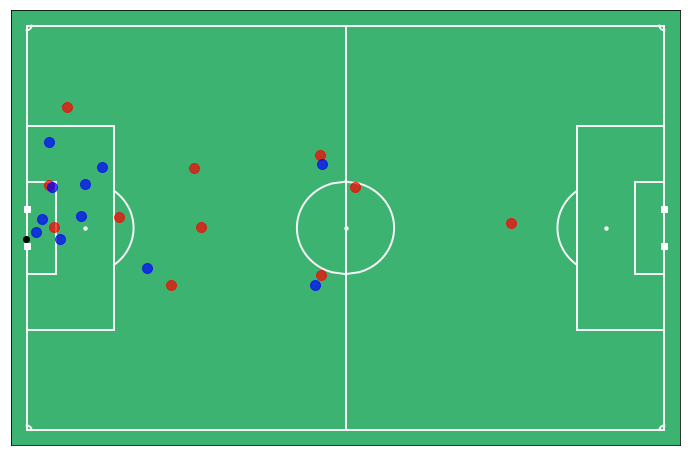

In [27]:
max_xg_frame = tracking_frames['xG'].idxmax
fig,ax = mfun.plot_frame( tracking_frames.loc[max_xg_frame, tracking_home.columns], tracking_frames.loc[max_xg_frame, tracking_away.columns], field_dimen = (120, 80))

Highest xG is when the ball is about to go into the back of the net. This shows the need to filter to only include frames where the ball is 'in control' (within reach) of an attacking player.

### Filtering for xG_available

Also interested in where the ball is close to attacking team, these are the only practical times they could actually shoot. Not useful to say there's a high xG in the middle of a pass between two teammates.

In [28]:
tracking_frames = mfun.create_xG_available(tracking_frames, attacking_team = 'Home')
tracking_frames.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,distance,angle,distance_nearest_defender,number_blocking_defenders,xG,distance_nearest_attacker,xG_available
0,2,2944.04,114.5076,38.3840,99.9660,47.5952,98.3304,39.7776,99.0168,31.3080,94.0212,20.6680,77.4744,37.0456,85.7964,37.1216,82.9884,28.9192,78.8604,11.8024,67.0140,43.1328,68.9016,21.0704,NaN,NaN,NaN,NaN,NaN,NaN,85.9632,36.9216,29.1348,37.1792,71.8860,12.2800,65.6304,20.5376,60.3024,38.4784,67.4688,54.4128,89.0748,21.1224,73.0884,40.0120,85.1820,29.5272,87.0300,59.9872,92.4360,44.3368,97.4772,27.6896,NaN,NaN,86.018302,0.084937,7.435551,2.0,0.000049,0.260427,0.000049
1,2,2944.08,114.4548,38.4000,99.8580,47.7112,98.1756,39.8632,98.9760,31.3712,93.9600,20.7464,77.2428,36.9448,85.6260,37.3232,82.7616,28.9880,78.7476,11.8640,66.9048,43.2080,68.7468,21.1264,NaN,NaN,NaN,NaN,NaN,NaN,85.7916,37.1264,29.0652,37.1704,71.6748,12.4088,65.4576,20.6824,60.2508,38.6136,67.2744,54.3944,88.9644,21.1728,72.9624,40.0856,84.9540,29.5952,86.8536,59.8576,92.3136,44.4008,97.3728,27.7104,NaN,NaN,85.839712,0.085120,7.577635,2.0,0.000050,0.257203,0.000050
2,2,2944.12,114.4008,38.4160,99.7464,47.8328,98.0196,39.9512,98.9328,31.4288,93.8988,20.8184,77.0088,36.8464,85.4532,37.5256,82.5300,29.0592,78.6336,11.9184,66.7920,43.2856,68.5896,21.1848,NaN,NaN,NaN,NaN,NaN,NaN,85.6224,37.3280,28.9944,37.1680,71.4612,12.5304,65.2836,20.8224,60.1968,38.7464,67.0788,54.3792,88.8492,21.2256,72.8328,40.1616,84.7140,29.6840,86.6748,59.7216,92.1900,44.4664,97.2672,27.7336,NaN,NaN,85.664082,0.085301,7.697787,2.0,0.000052,0.260143,0.000052
3,2,2944.16,114.3480,38.4320,99.6360,47.9520,97.8660,40.0288,98.8872,31.4888,93.8364,20.8832,76.7712,36.7568,85.2804,37.7240,82.2936,29.1320,78.5160,11.9752,66.6768,43.3600,68.4276,21.2376,NaN,NaN,NaN,NaN,NaN,NaN,85.4496,37.5304,28.9212,37.1760,71.2428,12.6544,65.1048,20.9568,60.1416,38.8760,66.8844,54.3632,88.7328,21.2712,72.7032,40.2344,84.4764,29.7688,86.4924,59.5864,92.0652,44.5280,97.1592,27.7584,NaN,NaN,85.485280,0.085485,7.822375,0.0,0.000104,0.257118,0.000104
4,2,2944.20,114.2916,38.4472,99.5208,48.0776,97.7136,40.1024,98.8392,31.5496,93.7716,20.9424,76.5336,36.6632,85.1076,37.9232,82.0536,29.1992,78.3948,12.0336,66.5580,43.4408,68.2632,21.2928,NaN,NaN,NaN,NaN,NaN,NaN,85.2768,37.7288,28.8456,37.1840,71.0232,12.7808,64.9260,21.0936,60.0816,39.0016,66.6888,54.3496,88.6128,21.3192,72.5688,40.3080,84.2304,29.8608,86.3088,59.4448,91.9380,44.5920,97.0500,27.7848,NaN,NaN,85.307039,0.085669,7.937278,0.0,0.000107,0.257721,0.000107


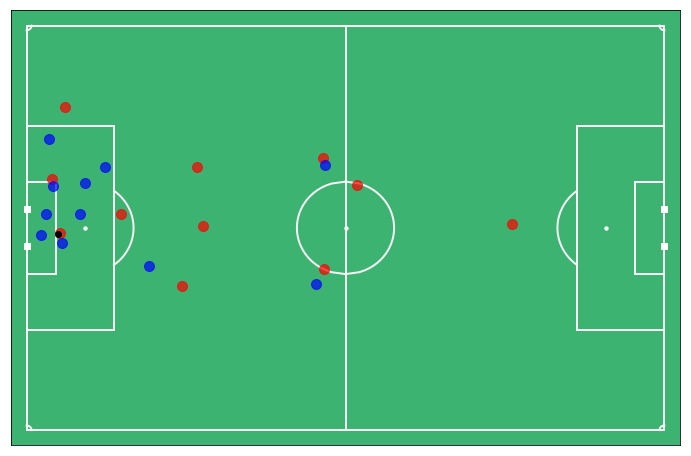

In [17]:
max_xg_frame = tracking_frames['xG_available'].idxmax
fig,ax = mfun.plot_frame( tracking_frames.loc[max_xg_frame, tracking_home.columns], tracking_frames.loc[max_xg_frame, tracking_away.columns], field_dimen = (120, 80))

Using filtered tracking data (only where ball is close to a player), the highest xG ball location is when the shot is taken.

## Tracking and xG Time Series

### Plot Pitch and Time Series

In [29]:
PLOTDIR = 'sample-data-master/data'
mfun.save_match_clip_xg(tracking_frames,
                        PLOTDIR,
                        fname='home_goal_2',
                        field_dimen=(120, 80))


Generating movie...done
